### Training of modified U-Net for Optic Disc on DRISHTI-GS database

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Carrega imagens de treino e teste com tamanho 512px.

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')
#-----------------------------------------------------------------------------------------------------------#
img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

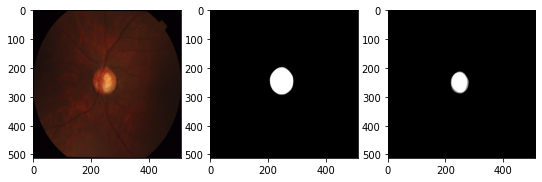

(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(np.squeeze(img_train[0]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 3, 2)
ax.imshow(np.squeeze(disc_train[0]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 3, 3)
ax.imshow(np.squeeze(cup_train[0]), cmap=plt.cm.Greys_r)
plt.show()

img_train, cup_train, disc_train, disc_locations

#### Generator of augmented data:

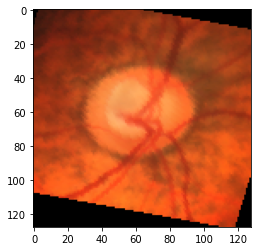

In [4]:
gen = data_generator(img_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)
plt.imshow(batch[0][0])

In [5]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(img_test, cup_test, disc_locations_test, img_size,  train_or_test='test', batch_size=100, stationary=True))
len(X_test), len(Y_test)

(51, 51)

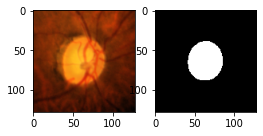

In [6]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and testing cup

In [7]:
epochs = NUM_EPOCHS
spe = SPE
model = create_compile_model(img_size)
history_cup = train(img_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_color', 
                    model, epochs, X_test, Y_test, img_size, spe)

99/99 [==============================] - 38s 368ms/step - loss: 1.5572 - mean_IOU_gpu: 0.0690 - dice_metric: 0.1282 - val_loss: 1.4559 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00


### Visual check

image #0


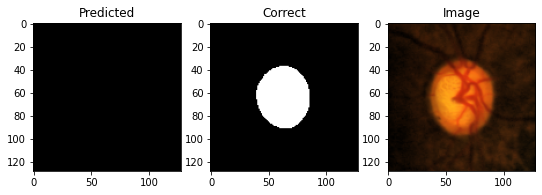

IOU: 0.0
Dice: 0.0
image #1


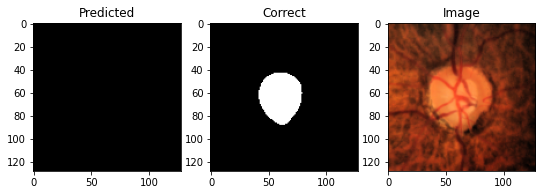

IOU: 0.0
Dice: 0.0
image #2


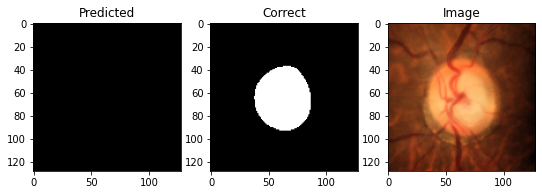

IOU: 0.0
Dice: 0.0
image #3


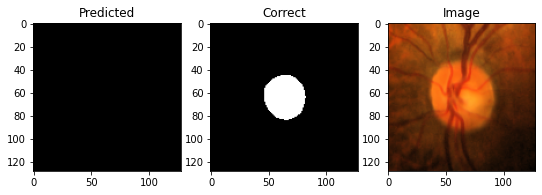

IOU: 0.0
Dice: 0.0
image #4


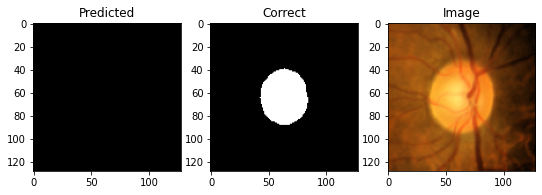

IOU: 0.0
Dice: 0.0
image #5


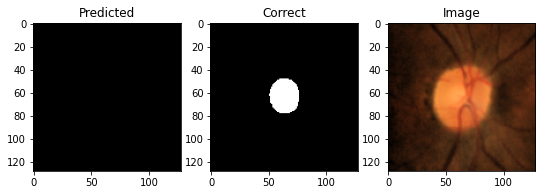

IOU: 0.0
Dice: 0.0
image #6


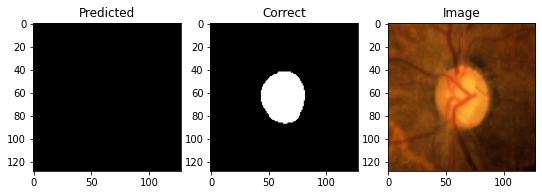

IOU: 0.0
Dice: 0.0
image #7


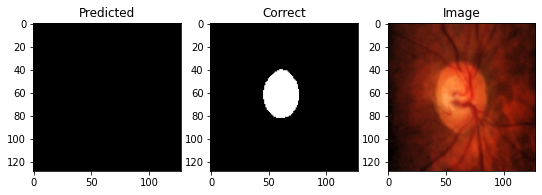

IOU: 0.0
Dice: 0.0
image #8


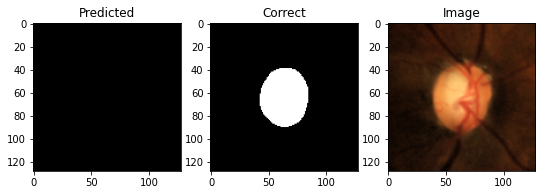

IOU: 0.0
Dice: 0.0
image #9


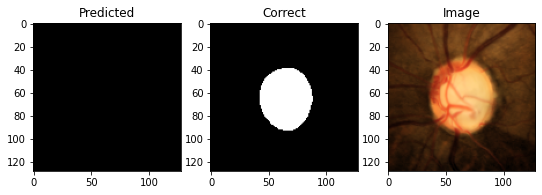

IOU: 0.0
Dice: 0.0
image #10


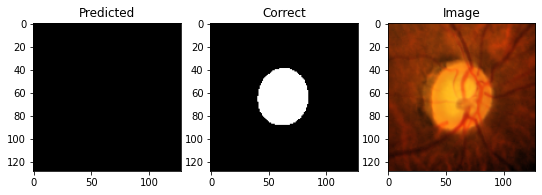

IOU: 0.0
Dice: 0.0
image #11


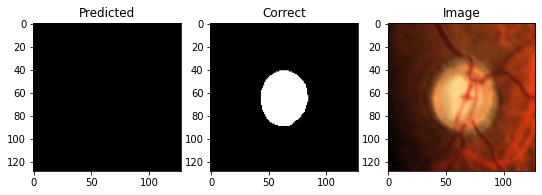

IOU: 0.0
Dice: 0.0
image #12


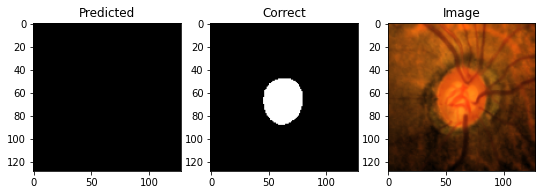

IOU: 0.0
Dice: 0.0
image #13


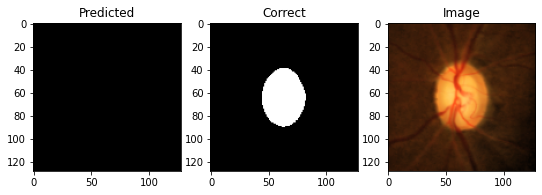

IOU: 0.0
Dice: 0.0
image #14


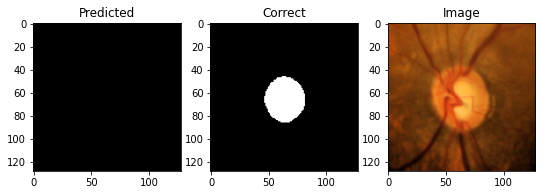

IOU: 0.0
Dice: 0.0
image #15


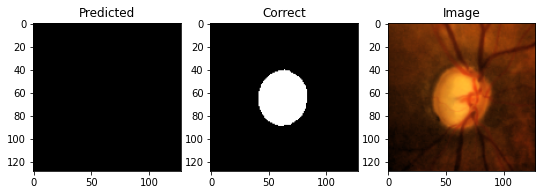

IOU: 0.0
Dice: 0.0
image #16


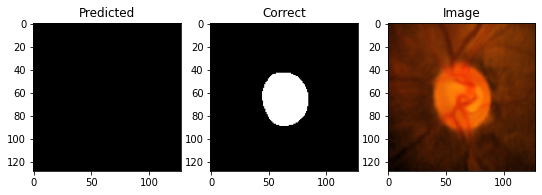

IOU: 0.0
Dice: 0.0
image #17


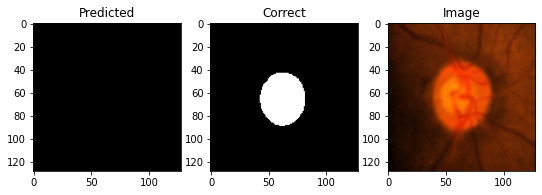

IOU: 0.0
Dice: 0.0
image #18


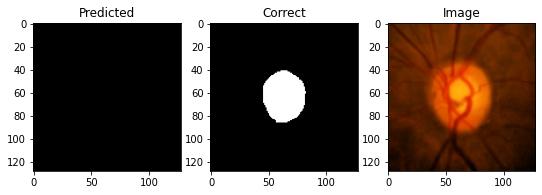

IOU: 0.0
Dice: 0.0
image #19


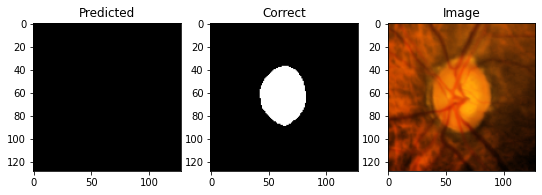

IOU: 0.0
Dice: 0.0
image #20


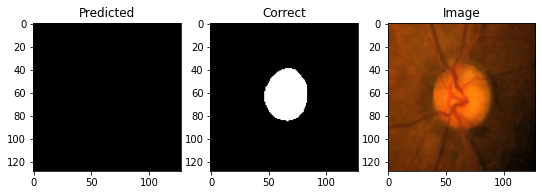

IOU: 0.0
Dice: 0.0
image #21


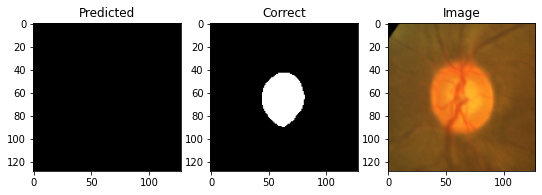

IOU: 0.0
Dice: 0.0
image #22


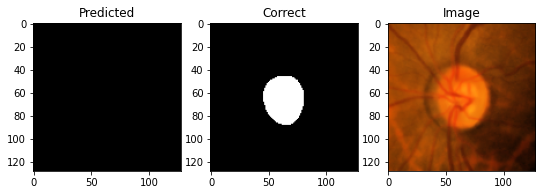

IOU: 0.0
Dice: 0.0
image #23


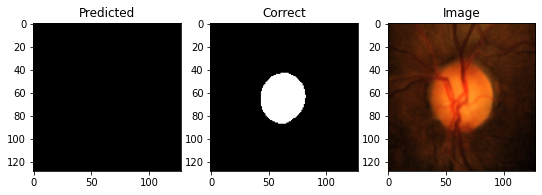

IOU: 0.0
Dice: 0.0
image #24


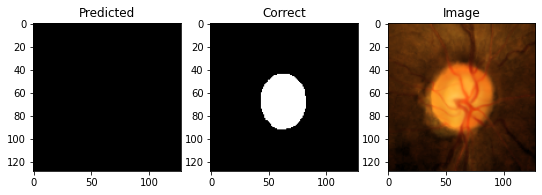

IOU: 0.0
Dice: 0.0
image #25


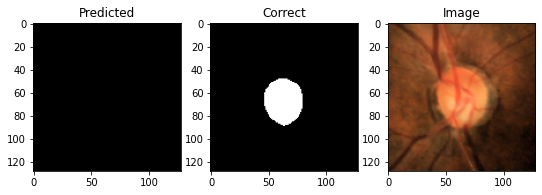

IOU: 0.0
Dice: 0.0
image #26


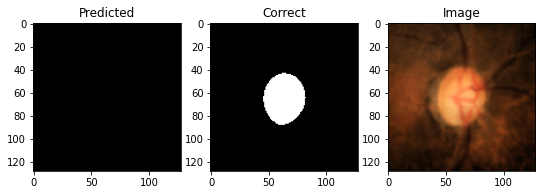

IOU: 0.0
Dice: 0.0
image #27


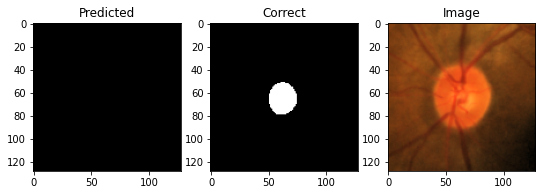

IOU: 0.0
Dice: 0.0
image #28


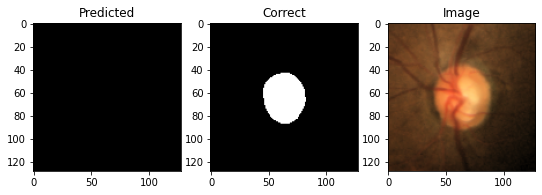

IOU: 0.0
Dice: 0.0
image #29


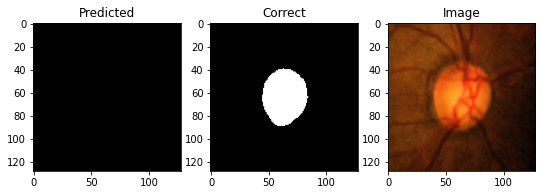

IOU: 0.0
Dice: 0.0
image #30


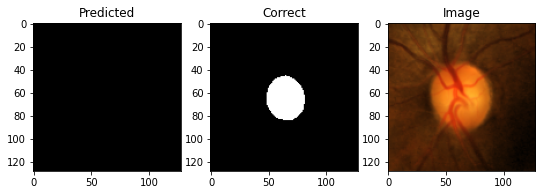

IOU: 0.0
Dice: 0.0
image #31


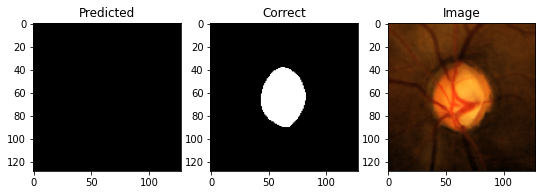

IOU: 0.0
Dice: 0.0
image #32


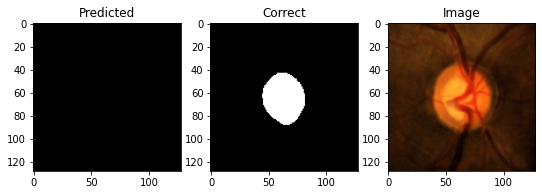

IOU: 0.0
Dice: 0.0
image #33


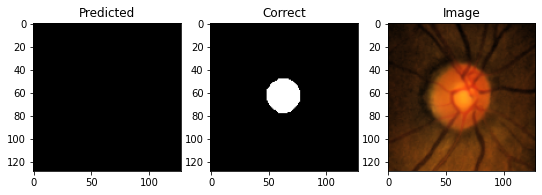

IOU: 0.0
Dice: 0.0
image #34


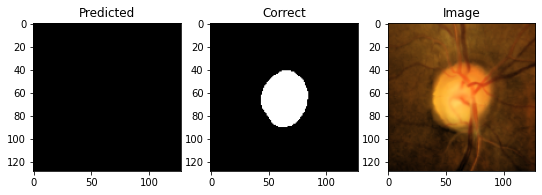

IOU: 0.0
Dice: 0.0
image #35


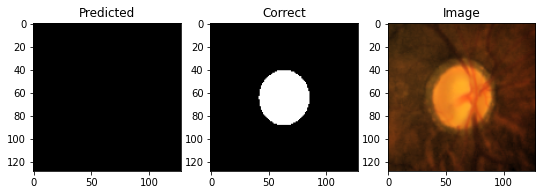

IOU: 0.0
Dice: 0.0
image #36


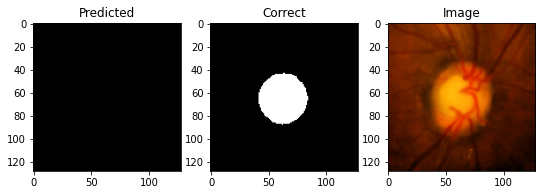

IOU: 0.0
Dice: 0.0
image #37


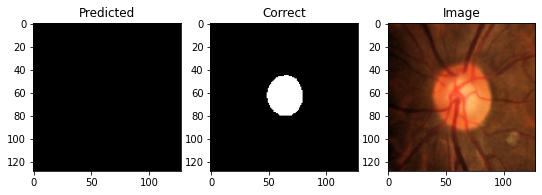

IOU: 0.0
Dice: 0.0
image #38


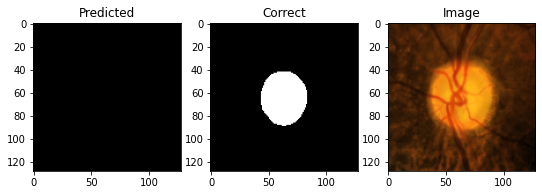

IOU: 0.0
Dice: 0.0
image #39


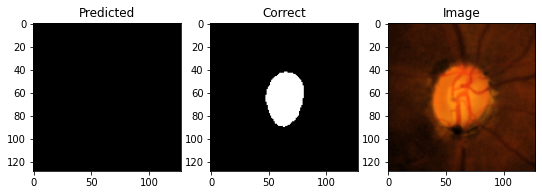

IOU: 0.0
Dice: 0.0
image #40


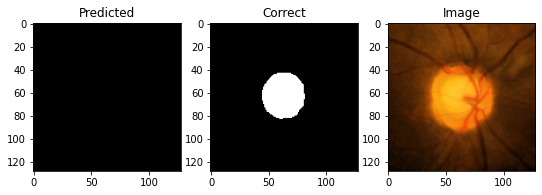

IOU: 0.0
Dice: 0.0
image #41


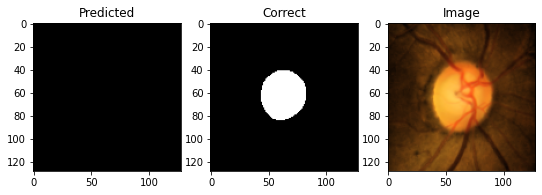

IOU: 0.0
Dice: 0.0
image #42


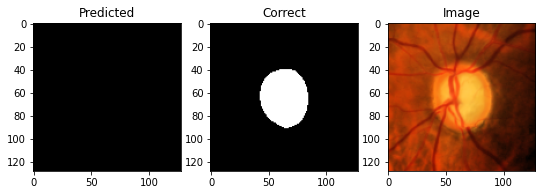

IOU: 0.0
Dice: 0.0
image #43


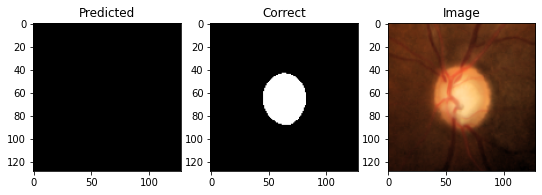

IOU: 0.0
Dice: 0.0
image #44


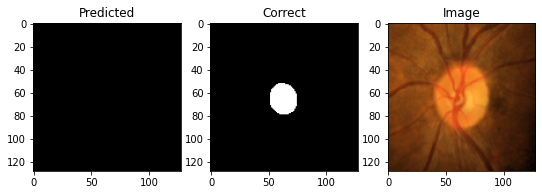

IOU: 0.0
Dice: 0.0
image #45


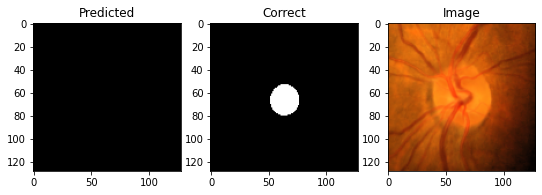

IOU: 0.0
Dice: 0.0
image #46


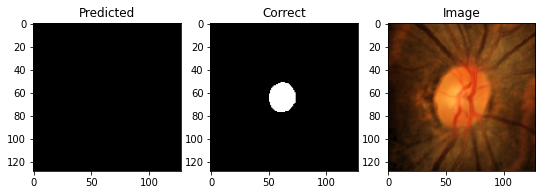

IOU: 0.0
Dice: 0.0
image #47


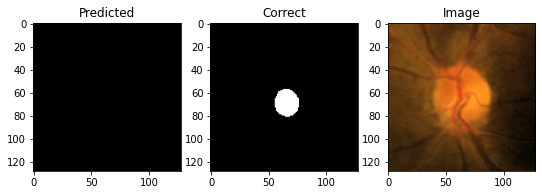

IOU: 0.0
Dice: 0.0
image #48


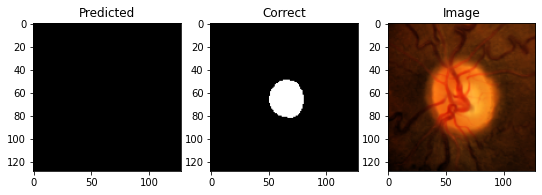

IOU: 0.0
Dice: 0.0
image #49


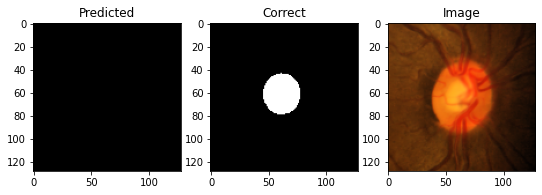

IOU: 0.0
Dice: 0.0
image #50


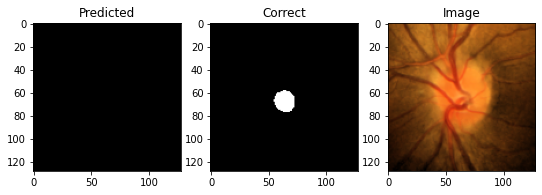

IOU: 0.0
Dice: 0.0


In [8]:
pred_iou, pred_dice, pred_cup = predict(img_test, X_test, Y_test, model, img_size)

In [9]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.0
0.0


In [10]:
X_test, Z_test = next(data_generator(img_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

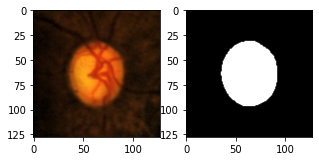

In [11]:
num = 1
for i in range(num):
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()

In [12]:
history_disc = train(img_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_color', 
                     model, epochs, X_test, Z_test, img_size, spe)

99/99 [==============================] - 40s 404ms/step - loss: 1.0039 - mean_IOU_gpu: 0.1893 - dice_metric: 0.3122 - val_loss: 0.9437 - val_mean_IOU_gpu: 0.7751 - val_dice_metric: 0.8652


image #0


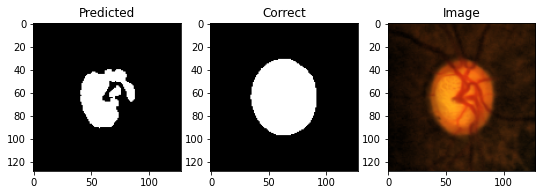

IOU: 0.49527665972709656
Dice: 0.6624548736462094
image #1


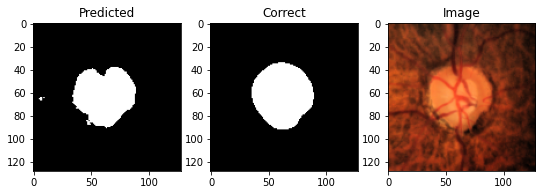

IOU: 0.8538429141044617
Dice: 0.9211599456275487
image #2


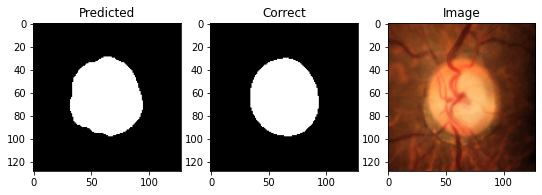

IOU: 0.925163984298706
Dice: 0.9611274585720923
image #3


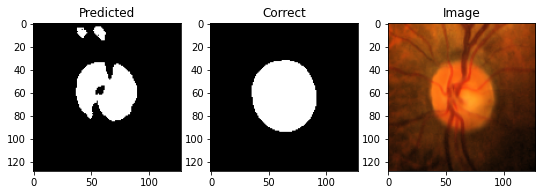

IOU: 0.6670131683349609
Dice: 0.8002494283932654
image #4


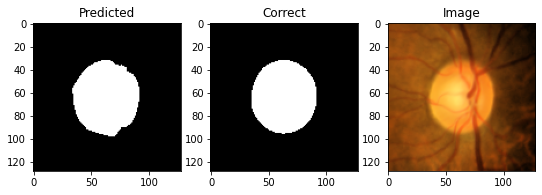

IOU: 0.9477434754371643
Dice: 0.973170731707317
image #5


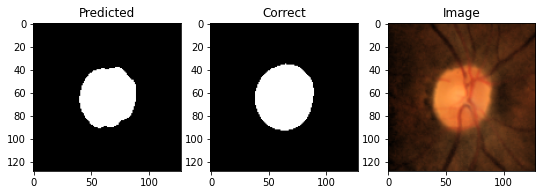

IOU: 0.8858767151832581
Dice: 0.9394852770693253
image #6


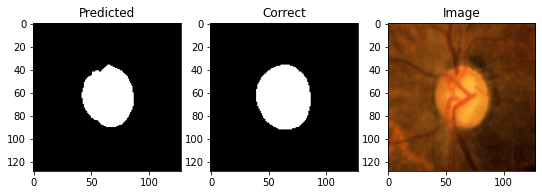

IOU: 0.8667944669723511
Dice: 0.9286447638603696
image #7


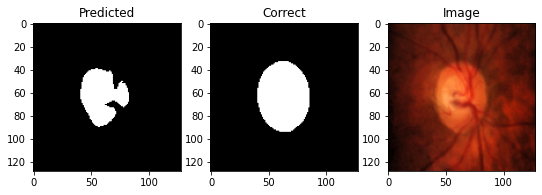

IOU: 0.6231684684753418
Dice: 0.7678420310296192
image #8


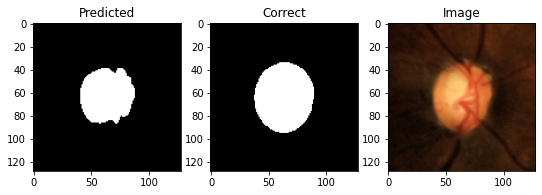

IOU: 0.7367993593215942
Dice: 0.8484565014031805
image #9


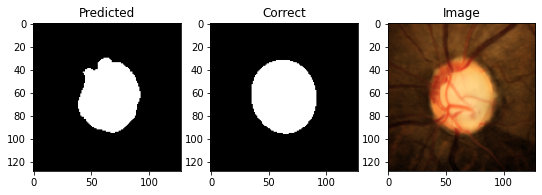

IOU: 0.8711465001106262
Dice: 0.9311366160681229
image #10


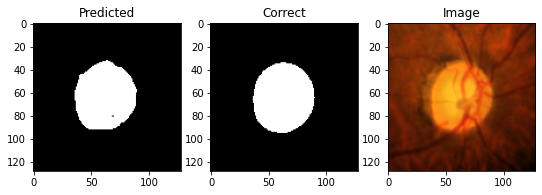

IOU: 0.9170472025871277
Dice: 0.9567288606589917
image #11


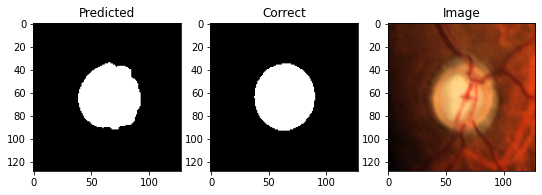

IOU: 0.8953441977500916
Dice: 0.9447826999790049
image #12


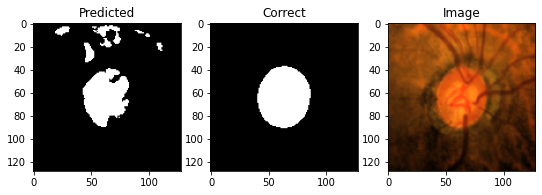

IOU: 0.5904186367988586
Dice: 0.7424694708276798
image #13


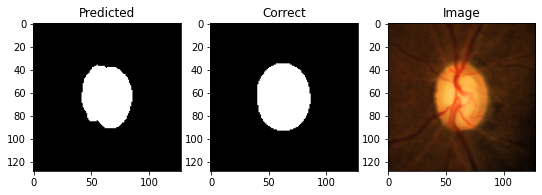

IOU: 0.8680555820465088
Dice: 0.929368029739777
image #14


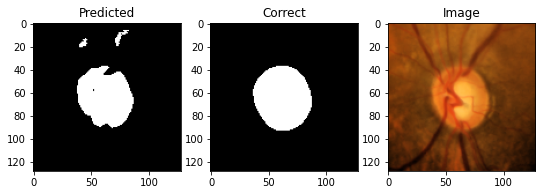

IOU: 0.8261625170707703
Dice: 0.9048072346501665
image #15


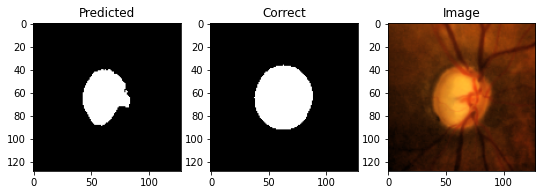

IOU: 0.6261426210403442
Dice: 0.7700955593029792
image #16


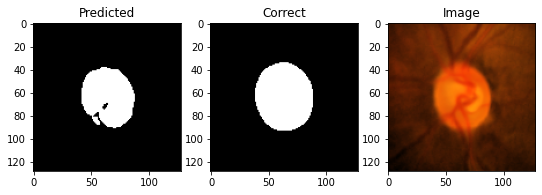

IOU: 0.777167022228241
Dice: 0.87461337140138
image #17


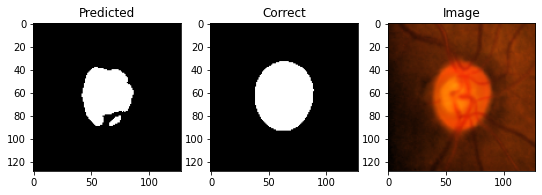

IOU: 0.6795672178268433
Dice: 0.8092170465807731
image #18


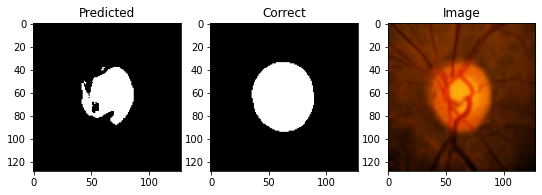

IOU: 0.5737833380699158
Dice: 0.7291770573566084
image #19


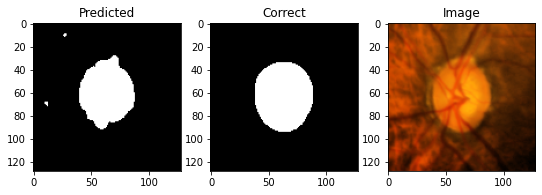

IOU: 0.8186878561973572
Dice: 0.90030607783122
image #20


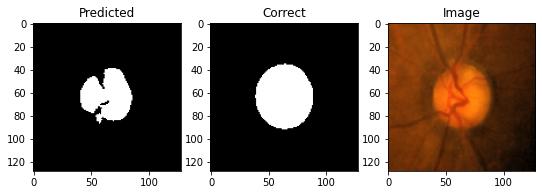

IOU: 0.6485260725021362
Dice: 0.7867950481430537
image #21


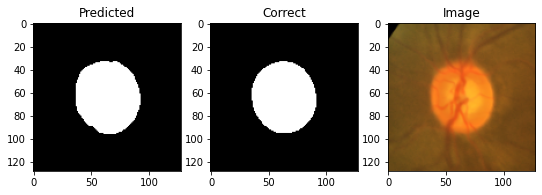

IOU: 0.95008784532547
Dice: 0.9744051910598414
image #22


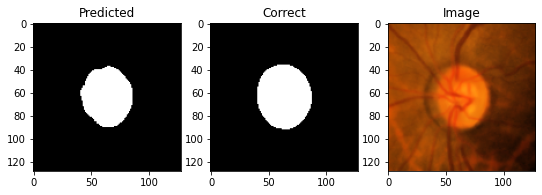

IOU: 0.8581016063690186
Dice: 0.9236326109391125
image #23


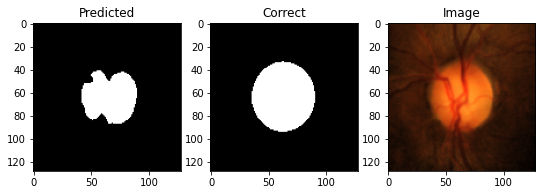

IOU: 0.6523919701576233
Dice: 0.7896334345085221
image #24


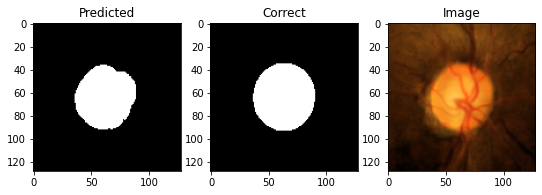

IOU: 0.8851674795150757
Dice: 0.9390862944162437
image #25


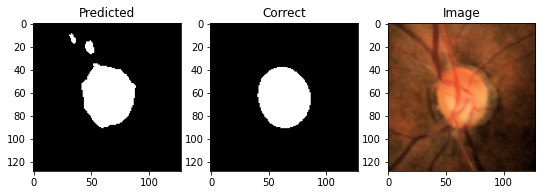

IOU: 0.8558385372161865
Dice: 0.9223200414293112
image #26


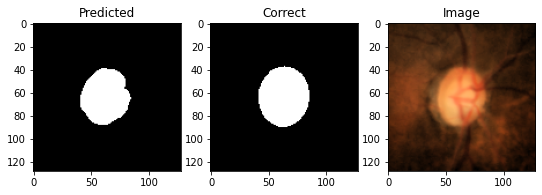

IOU: 0.8598796129226685
Dice: 0.9246615656268393
image #27


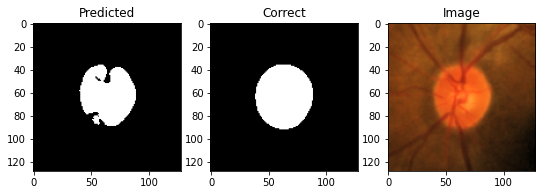

IOU: 0.8413699865341187
Dice: 0.9138521781693588
image #28


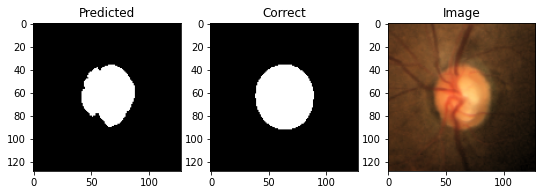

IOU: 0.7921847105026245
Dice: 0.8840436075322101
image #29


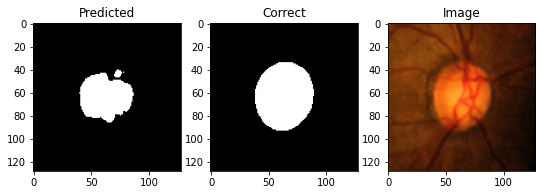

IOU: 0.6211993098258972
Dice: 0.7663454024485543
image #30


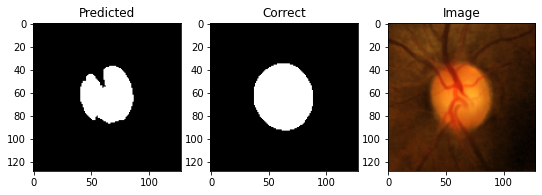

IOU: 0.7143468856811523
Dice: 0.83337496877342
image #31


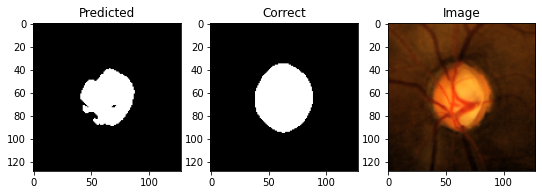

IOU: 0.7037362456321716
Dice: 0.826109391124871
image #32


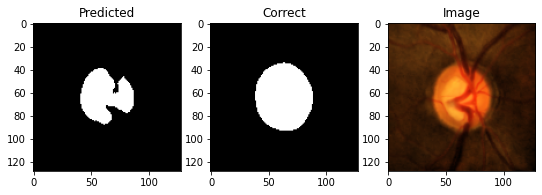

IOU: 0.6339130401611328
Dice: 0.7759446514103246
image #33


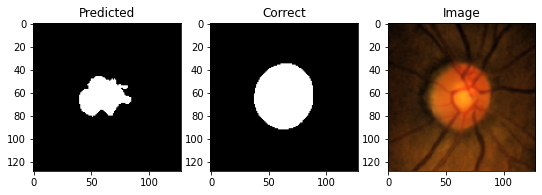

IOU: 0.4479440152645111
Dice: 0.6187311178247734
image #34


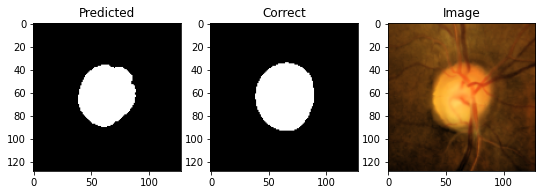

IOU: 0.8611346483230591
Dice: 0.9253867151956324
image #35


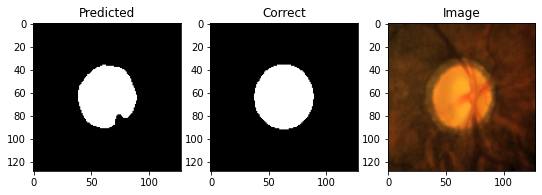

IOU: 0.9137549996376038
Dice: 0.9549341345042754
image #36


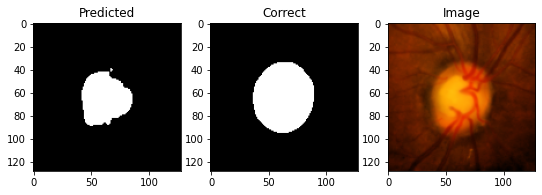

IOU: 0.6021969318389893
Dice: 0.7517140058765915
image #37


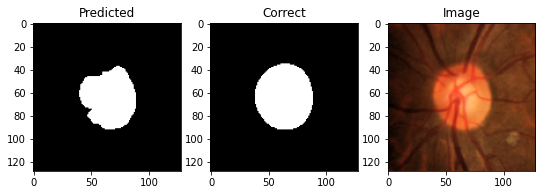

IOU: 0.8525809049606323
Dice: 0.9204250295159386
image #38


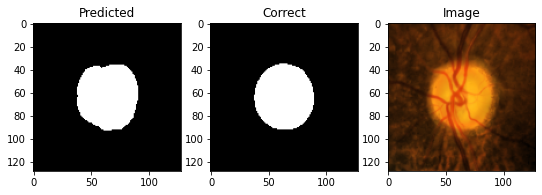

IOU: 0.9088748097419739
Dice: 0.9522623495226235
image #39


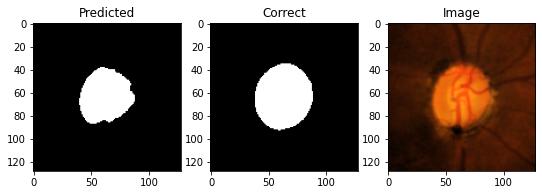

IOU: 0.7699194550514221
Dice: 0.8700050581689428
image #40


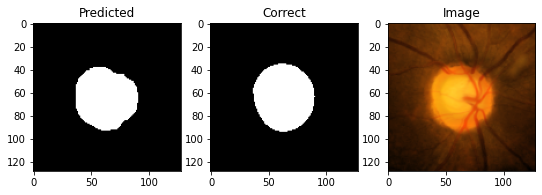

IOU: 0.8909744620323181
Dice: 0.9423442449841605
image #41


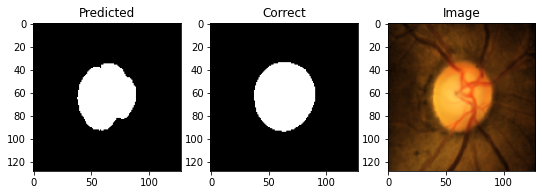

IOU: 0.8688656687736511
Dice: 0.9298321136461473
image #42


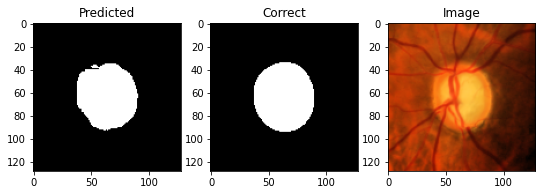

IOU: 0.9254609942436218
Dice: 0.9612876935615322
image #43


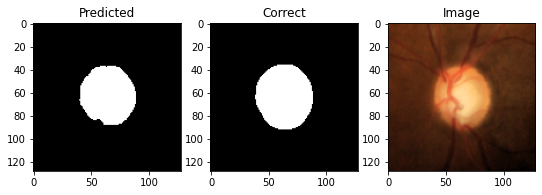

IOU: 0.8811252117156982
Dice: 0.9368065605402798
image #44


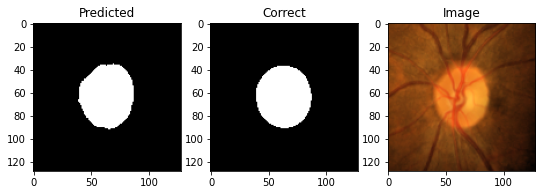

IOU: 0.9378238320350647
Dice: 0.9679144385026738
image #45


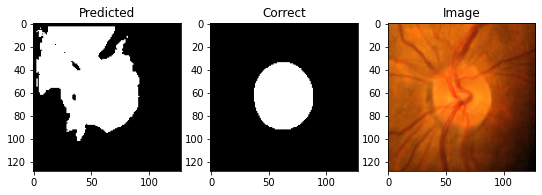

IOU: 0.392898827791214
Dice: 0.564145524174246
image #46


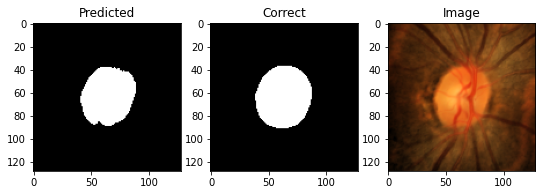

IOU: 0.8684828281402588
Dice: 0.9296128707893414
image #47


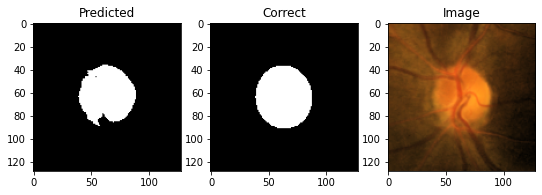

IOU: 0.8729333877563477
Dice: 0.932156368221942
image #48


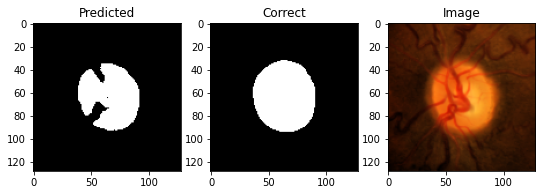

IOU: 0.799777090549469
Dice: 0.8887512899896801
image #49


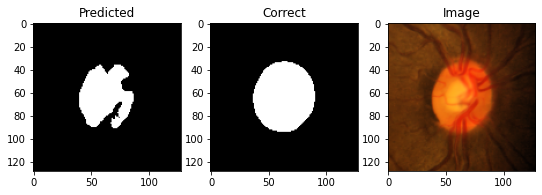

IOU: 0.6952789425849915
Dice: 0.8202531645569621
image #50


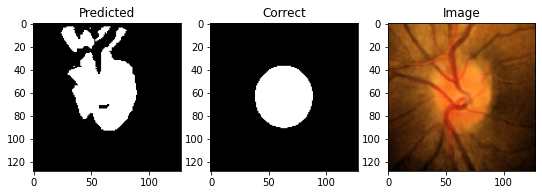

IOU: 0.5883392095565796
Dice: 0.7408231368186874


In [13]:
pred_iou, pred_dice, pred_disc = predict(img_test, X_test, Z_test, model, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.77530026
0.8659388870133671


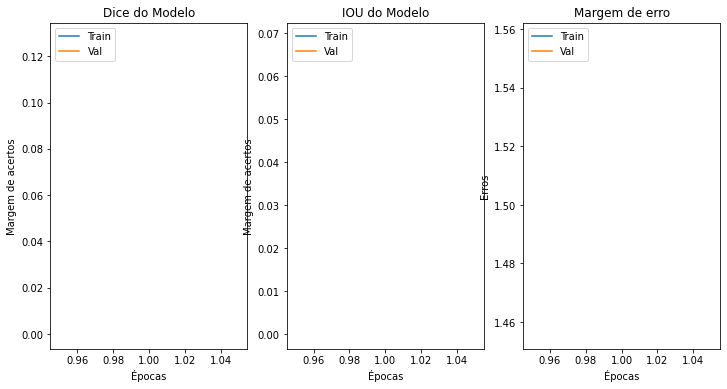

In [15]:
plot_results(history_cup, epochs)

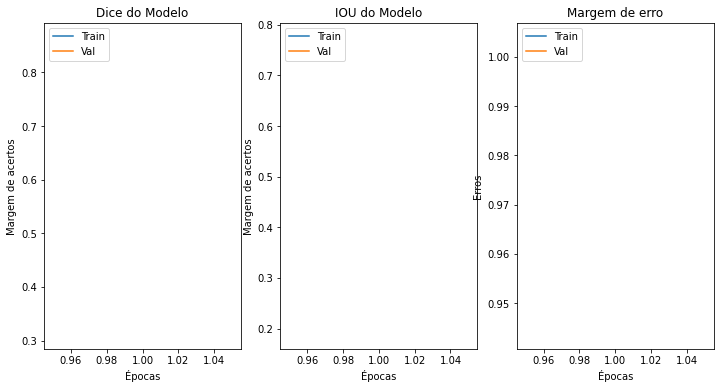

In [16]:
plot_results(history_disc, epochs)

In [17]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)
pd.DataFrame(data= result)
pd.DataFrame(data={'cup': diametros_cup, 'disc': diametros_disc})

erro
erro
erro
erro
erro
erro
erro
erro
erro
erro
erro


cup                                               disc
0   []          [(43.22153854370117, 49.412925720214844)]
1   []  [(2.6705057621002197, 5.948736190795898), (50....
2   []           [(62.97615051269531, 67.67259979248047)]
3   []  [(6.764759540557861, 9.393324851989746), (46.7...
4   []            [(57.62139129638672, 64.3511734008789)]
5   []          [(48.53215408325195, 53.522647857666016)]
6   []          [(44.46345901489258, 52.282955169677734)]
7   []          [(39.797569274902344, 46.88045883178711)]
8   []           [(46.72053146362305, 50.10649108886719)]
9   []         [(52.465824127197266, 62.920475006103516)]
10  []          [(53.424049377441406, 59.69071960449219)]
11  []            [(54.01604461669922, 56.7245979309082)]
12  []           [(43.98292541503906, 54.79226303100586)]
13  []          [(38.74135971069336, 46.699337005615234)]
14  []  [(5.469601154327393, 11.79959487915039), (43.4...
15  []             [(56.352783203125, 63.92816162109375)]
16  []           [(44.155128479003906, 52.0007438659668)]
17  []           [(45.11870193481445, 49.74111557006836)]
18  []           [(51.54617691040039, 56.14019012451172)]
19  []  [(45.51438522338867, 53.964942932128906), (7.4...
20  []           [(42.00540542602539, 48.90089797973633)]
21  []          [(45.357139587402344, 50.90132141113281)]
22  []  [(39.859886169433594, 47.101463317871094), (5....
23  []          [(43.063987731933594, 46.53020477294922)]
24  []          [(32.44078063964844, 43.089962005615234)]
25  []          [(48.329471588134766, 54.39189910888672)]
26  []          [(49.330360412597656, 54.17144775390625)]
27  []  [(44.14379119873047, 46.47618865966797), (2.21...
28  []          [(48.045509338378906, 53.18933868408203)]
29  []          [(54.48294448852539, 58.508811950683594)]
30  []           [(44.8466911315918, 50.071632385253906)]
31  []           [(52.88517761230469, 56.42496109008789)]
32  []           [(49.18618392944336, 56.80452346801758)]
33  []            [(52.80137634277344, 58.5244255065918)]
34  []           [(48.05805587768555, 51.88010787963867)]
35  []           [(47.34018325805664, 56.30975341796875)]
36  []           [(45.28512191772461, 53.59328079223633)]
37  []          [(49.02458572387695, 49.764183044433594)]
38  []  [(2.58198881149292, 2.58198881149292), (24.187...
39  []         [(44.922916412353516, 54.037010192871094)]

In [18]:
a = [(9,3),(1,1)]
max(max(a))

9